<a href="https://colab.research.google.com/github/justin-hsieh/DS-Unit-2-Regression-Classification/blob/master/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [x] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [x] After you remove outliers, what is the mean price in your subset of the data?
- [x] Choose a feature, and plot its relationship with the target.
- [x] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [x] Define a function to make new predictions and explain the model coefficient.
- [x] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [5]:
df.shape

(49352, 34)

In [6]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,"49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352","49,352"
mean,1,2,41,-74,"3,830",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
std,1,1,1,1,"22,067",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,0,0,0,-118,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,1,1,41,-74,"2,500",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,1,1,41,-74,"3,150",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,1,2,41,-74,"4,100",1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,10,8,45,0,"4,490,000",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
# function that returns upper and lower bounds to help with outlier removal
def outlier_identifier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
  #new_df = df.loc[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]
  return lower_bound, upper_bound

In [8]:
# print out outliers
print(outlier_identifier(df, 'price'))
print(outlier_identifier(df, 'latitude'))
print(outlier_identifier(df, 'longitude'))

(100.0, 6500.0)
(40.6593, 40.8433)
(-74.04704999999998, -73.89945000000003)


In [9]:
# create conditions for new df
condition = ((df['price'] >= 100.0)&
              (df['price'] <= 6500.0)&
              (df['latitude'] >= 40.6593)&
              (df['latitude'] <= 40.8433)&
              (df['longitude'] >= -74.04704999999998)&
              (df['longitude'] <= -73.89945000000003)
             
             )
df = df[condition]
df.shape

(43766, 34)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

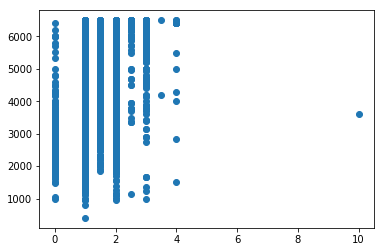

In [11]:
plt.scatter(df['bathrooms'], df['price'])

In [0]:
from sklearn.linear_model import LinearRegression

# initiate model
model = LinearRegression()

# specify features and target
features = ['bathrooms']

target = 'price'

# specify x and y
X = df[features]
y = df[target]

# fit model to the data
model.fit(X,y)

# make a prediction
y_pred = model.predict(X)

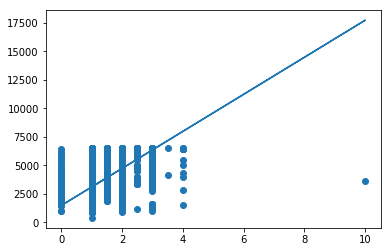

In [13]:

plt.scatter(X, y)
plt.plot(X, y_pred);

In [14]:
model.coef_[0]

1622.2214056077528

In [15]:
model.intercept_

1491.1633165425897

In [0]:
def predict(feature):
    y_pred = model.predict([[feature]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    return y_pred[0], estimate, coefficient